In [15]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
import sys
sys.path.append('/home/paperspace/fastai/old')
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [17]:
PATH = "/home/paperspace/data/art/dataset"
sz = 224

In [18]:
assert(torch.cuda.is_available())
assert(torch.backends.cudnn.enabled)

In [19]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

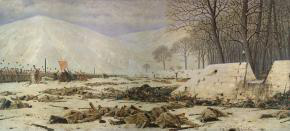

In [20]:
n = len(data.trn_ds.fnames)
PIL.Image.open(f"{PATH}/{data.trn_ds.fnames[random.randint(0, n-1)]}")

In [21]:
learn = ConvLearner.pretrained(arch, data, precompute=True)


100%|██████████| 14/14 [00:03<00:00,  4.66it/s]


 88%|████████▊ | 107/121 [00:01<00:00, 62.74it/s, loss=1.73]


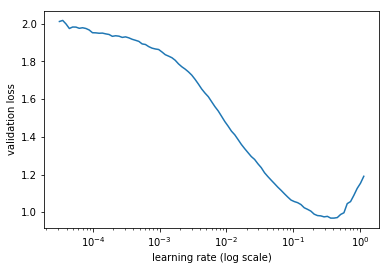

In [24]:
lrf = learn.lr_find()
learn.sched.plot()

In [27]:
learn.fit(1e-2, 5)

epoch      trn_loss   val_loss   accuracy                    
    0      0.099591   0.272564   0.920561  
    1      0.085742   0.251816   0.920561                    
    2      0.108056   0.245      0.925234                    
    3      0.096583   0.233923   0.925234                    
    4      0.113182   0.214487   0.926402                    



[array([0.21449]), 0.9264018691588785]

[[ 93  11   1  10   7]                       
 [ 17  65   0   1   1]
 [  1   0 229   1   0]
 [  3   0   4 217   4]
 [  0   1   0   0 190]]


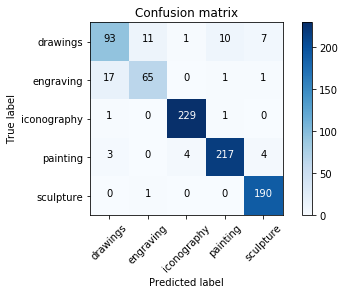

In [29]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

plot_confusion_matrix(cm, data.classes)

In [30]:
?learn.TTA